#Práctica 1: Sistemas de Vector de Soporte (SVM)
###*Técnicas Avanzadas de Análisis de Datos*, Máster Universitario en Ciberseguridad e Inteligencia de Datos.
####*Alba Cruz Torres*

<p align="justify">Una Máquina de Vector de Soporte (SVM) es un hiperplano separador. Se en carga de separar clases en el espacio de características. A lo largo de esta práctica, se crearán dos conjuntos de datos artificiales, uno de ellos linealmente separable y otro no linealmente separable. Estos conjuntos de datos junto con un <i> dataset</i> de datos reales, serán analizados con un svm con distintos kernels y serán comparados con varios algoritmos de clasificación vistos en asignaturas anteriores.</p>

## Importación de paquetes y librerías

<p align="justify">Lo primero que se debe hacer es la instalación de los paquetes y librerías necesarios para el desarrollo de esta práctica. En este caso, se harán uso de varios métodos de la librería <i>Scikit - Learn</i> con la que se podrán llevar a cabo los distintos modelos predictivos, ver sus resultados de clasificación, etc.</p>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import sklearn.datasets as ds
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split
import sklearn.svm as svm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#Conjunto de datos artificiales

<p align="justify">En primer lugar, se procede a la creación de conjuntos de datos artificiales. Estos se harán con datos aleatorios generados con las funciones <i> random</i> que provee la librería <i> numpy</i>.</p>

<p align="justify">Luego, se utiliza una función para mostrar en una gráfica los datos generados por los modelos que se van a entrenar.</p>

In [ ]:
# We generate a grid in the square [-3,3 ]^2.
xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))

# This function takes a SVM estimator as input.
def plot_decision_function(est, title):
    # We evaluate the decision function on the grid.
    Z = est.decision_function(np.c_[xx.ravel(),
                                    yy.ravel()])
    Z = Z.reshape(xx.shape)
    cmap = plt.cm.Blues

    # We display the decision function on the grid.
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    ax.imshow(Z,
              extent=(xx.min(), xx.max(),
                      yy.min(), yy.max()),
              aspect='auto',
              origin='lower',
              cmap=cmap)

    # We display the boundaries.
    ax.contour(xx, yy, Z, levels=[0],
               linewidths=2,
               colors='k')

    # We display the points with their true labels.
    ax.scatter(X[:, 0], X[:, 1],
               s=50, c=.5 + .5 * y,
               edgecolors='k',
               lw=1, cmap=cmap,
               vmin=0, vmax=1)
    ax.axhline(0, color='k', ls='--')
    ax.axvline(0, color='k', ls='--')
    ax.axis([-3, 3, -3, 3])
    ax.set_axis_off()
    ax.set_title(title)

## Conjunto de datos artificiales linealmente separable

<p align="justify">En el caso del conjunto de datos linealmente separable, se generan puntos binarios aleatorios, es decir, [x,y] y se etiquetan para poderlos separar linealmente en el mapa.</p>

In [ ]:
X = np.random.randn(200, 2)
y = X[:, 0] + X[:, 1] > 1

### Entrenamiento y test

<p align="justify">Una vez creado el conjunto de datos aleatorios y la función con la que mostrar los resultados de clasificación, se procede a dividir el conjunto de datos en dos subconjuntos: uno para el entrenamiento del modelo y otro para su validación.</p>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print("X_train shape ",X_train.shape)
print("y_train shape ",y_train.shape)
print("X_test shape ",X_test.shape)
print("y_test shape ",y_test.shape)

X_train shape  (150, 2)
y_train shape  (150,)
X_test shape  (50, 2)
y_test shape  (50,)


### SVM con distintos Kernels

<p align="justify">El siguiente paso es el de crear los modelos de clasificación con un SVM y distintos Kernels, con el fin de comparar los resultados.</p>

#### Kernel Lineal

<p align="justify">El primer Kernel que se va a utilizar es el lineal. Como se trata de un conjunto de datos linealmente separable, deberían poderse etiquetar los puntos de manera que queden separados por una línea recta, como se observa en el siguiente gráfico.</p>

Score: 1.0


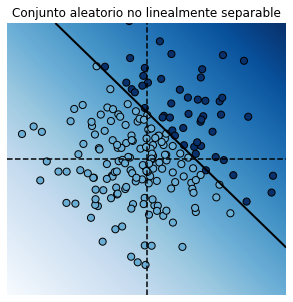

In [ ]:
# We train the classifier y comprobamos que NO es linealmente separable.
est = svm.LinearSVC()
est.fit(X_train, y_train)
print("Score: {0:.1f}".format(
      ms.cross_val_score(est, X_train, y_train).mean()))

# We plot the decision function.
ax = plot_decision_function(
    est, "Conjunto aleatorio no linealmente separable")

<p align="justify">Una vez se tiene el modelo entrenado, es el momento de hacer las predicciones y su validación con los conjuntos de test. En este caso, se puede ver como se consigue un porcentaje de exactitud de clasificación o <i>accuracy</i> del 100%. Es decir, el SVM con Kernel Lineal ha conseguido clasificar todos los puntos correctamente.</p>

In [ ]:
y_pred = est.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[37  0]
 [ 0 13]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        37
        True       1.00      1.00      1.00        13

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



#### Kernel RBF

<p align="justify">El siguiente kernel que se utiliza es el RBF (<i>Radial Basis Function</i>), que es el kernel que trae el SVM por defecto. En el siguiente gráfico, se puede ver también que ha conseguido separar y etiquetar los puntos trazando una línea recta que los separa.</p>

Score: 0.960


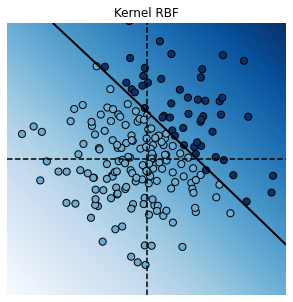

In [ ]:
#se usa kernel RBF porque es el por defecto
est = ms.GridSearchCV(
    svm.SVC(), {'C': np.logspace(-3., 3., 10),
                'gamma': np.logspace(-3., 3., 10)})
est.fit(X_train, y_train)
print("Score: {0:.3f}".format(
      ms.cross_val_score(est, X_train, y_train).mean()))

plot_decision_function(
    est.best_estimator_, "Kernel RBF")

<p align="justify">Después de realizar las predicciones, se obtiene como resultado un porcentaje de <i>accuracy</i> también del 100% o lo que es lo mismo, este modelo ha conseguido etiquetar correctamente los 50 datos utilizados para su validación.</p>

In [ ]:
y_pred = est.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[37  0]
 [ 0 13]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        37
        True       1.00      1.00      1.00        13

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



#### Kernel Polinomial

<p align="justify">A continuación, se ha decidido utilizar el kernel polinomial para la clasificación de los datos. Este kernel acaba clasificando, una vez más, con una línea recta los puntos en el plano, ya que una recta es un polinomio de grado 1.</p>

Score: 0.987


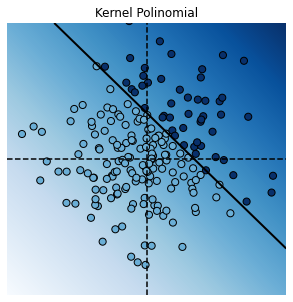

In [ ]:
#se usa poliniomio
est = ms.GridSearchCV(
      svm.SVC(kernel='poly', degree=1), {'C': np.logspace(-3., 3., 10),
                'gamma': np.logspace(-3., 3., 10)})
est.fit(X_train, y_train)
print("Score: {0:.3f}".format(
      ms.cross_val_score(est, X_train, y_train).mean()))

plot_decision_function(
    est.best_estimator_, "Kernel Polinomial")

Asimismo, se calculan las predicciones con el conjunto de datos de validación y se consigue, una vez más, un porcentaje de exactitud del 100%.

In [ ]:
y_pred = est.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[37  0]
 [ 0 13]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        37
        True       1.00      1.00      1.00        13

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



#### Kernel Sigmoide

<p align="justify">El último de los kernels que se va a utilizar es el Sigmoide, que acaba representando una línea en forma de "S" con la que consigue etiquetar casi todos los puntos en el espacio. </p>

Score: 0.987


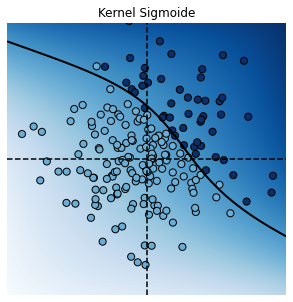

In [ ]:
#se usa sigmoide
est = ms.GridSearchCV(
      svm.SVC(kernel='sigmoid'), {'C': np.logspace(-3., 3., 10),
                'gamma': np.logspace(-3., 3., 10)})
est.fit(X_train, y_train)
print("Score: {0:.3f}".format(
      ms.cross_val_score(est, X_train, y_train).mean()))

plot_decision_function(
    est.best_estimator_, "Kernel Sigmoide")

<p align="justify">Una vez realizadas las predicciones, se puede ver que con este modelo se consiguen etiquetar los puntos con una exactitud del 98%. Lo cual es bastante alto y bueno para un modelo predictivo.</p>

In [ ]:
y_pred = est.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[37  0]
 [ 1 12]]
              precision    recall  f1-score   support

       False       0.97      1.00      0.99        37
        True       1.00      0.92      0.96        13

    accuracy                           0.98        50
   macro avg       0.99      0.96      0.97        50
weighted avg       0.98      0.98      0.98        50



### Algoritmos Clasificadores

<p align="justify">Lo siguiente que se va a hacer es comparar los resultados de los SVM con los distintos kernels anteriores, con varios algoritmos de clasificación estudiados en otras asignaturas. En este proyecto, se ha decidido utilizar <i>Random Forest</i>, <i>K-Nearest Neighbors</i> y <i>Decision Tree</i>.</p>

#### Random Forest

<p align="justify">El primero de los algoritmos que se va a utilizar es <i>Random Forest</i>. Por tanto, se debe crear la instancia del modelo con dicho algoritmo. Luego, se entrena el modelo con los subconjuntos de datos creados para su entrenamiento y, finalmente, se llevan a cabo las predicciones con los subconjuntos de testeo. En este caso, se obtiene como resultado un porcentaje de <i>accuracy</i> del 90%, el cual es un resultado bastante más bajo que los conseguidos anteriormente.</p>

In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[37  0]
 [ 5  8]]
              precision    recall  f1-score   support

       False       0.88      1.00      0.94        37
        True       1.00      0.62      0.76        13

    accuracy                           0.90        50
   macro avg       0.94      0.81      0.85        50
weighted avg       0.91      0.90      0.89        50



#### K-Nearest Neighbors

<p align="justify">A continuación, se crea la instancia del modelo pero con el algoritmo de los <i>k</i> vecinos más cercanos. Con este algoritmo, se consiguen clasificar correctamente 49 de los 50 datos de validación. Es decir, da como resultado una exactitud del 98%.</p>

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[37  0]
 [ 1 12]]
              precision    recall  f1-score   support

       False       0.97      1.00      0.99        37
        True       1.00      0.92      0.96        13

    accuracy                           0.98        50
   macro avg       0.99      0.96      0.97        50
weighted avg       0.98      0.98      0.98        50



#### Decision Tree

<p align="justify">Finalmente, se hace uso del algoritmo <i>Decision Tree</i>. Después de haber creado la instancia del modelo y de haberlo entrenado con los subconjuntos de entrenamiento, se obtiene como resultado un porcentaje de <i>accuracy</i> del 96%, el cual es un resultado bastante alto y bueno, pero sigue siendo menor que los conseguidos con el SVM.</p>

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[37  0]
 [ 2 11]]
              precision    recall  f1-score   support

       False       0.95      1.00      0.97        37
        True       1.00      0.85      0.92        13

    accuracy                           0.96        50
   macro avg       0.97      0.92      0.95        50
weighted avg       0.96      0.96      0.96        50



##Conjunto de datos artificiales no linealmente separable

<p align="justify">Ahora, se van a realizar los mismos pasos que en el apartado anterior, pero esta vez se hará uso de un conjunto de datos artificiales no linealmente separables. Por tanto, se crean unos nuevos puntos de <i>y</i> que hace que los datos no sean linealmente separables.</p>

In [ ]:
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

#### Entrenamiento y Test

<p align="justify">Con el fin de validar el correcto funcionamiento de los modelos, se vuelven a dividir los datos en dos subconjuntos para el entrenamiento y el testeo del modelo. </p>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print("X_train shape ",X_train.shape)
print("y_train shape ",y_train.shape)
print("X_test shape ",X_test.shape)
print("y_test shape ",y_test.shape)

X_train shape  (150, 2)
y_train shape  (150,)
X_test shape  (50, 2)
y_test shape  (50,)


### SVM con diferentes Kernels


<p align="justify">A continuación, se realizan los mismos pasos que el apartado anterior. Es decir, se crearán varios SVM con distintos Kernels y también varios modelos con los mismos algoritmos de clasificación utilizados con anterioridad.

#### Kernel Lineal

<p align="justify">Como se puede observar en la siguiente imagen, el kernel lineal no es capaz de separar todos los puntos en el plano, pues, como su propio nombre indica, estos datos no son separables con una línea. Es por esto, que se obtiene como resultado de clasificación un porcentaje de <i>accuracy</i> del 52%, el cual es un resultado de clasificación muy bajo.

Score: 0.6


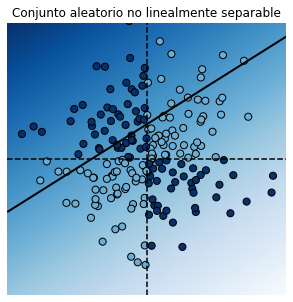

In [ ]:
# We train the classifier y comprobamos que NO es linealmente separable.
est = svm.LinearSVC()
est.fit(X_train, y_train)
print("Score: {0:.1f}".format(
      ms.cross_val_score(est, X_train, y_train).mean()))

# We plot the decision function.
ax = plot_decision_function(
    est, "Conjunto aleatorio no linealmente separable")

In [ ]:
y_pred = est.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[18  6]
 [18  8]]
              precision    recall  f1-score   support

       False       0.50      0.75      0.60        24
        True       0.57      0.31      0.40        26

    accuracy                           0.52        50
   macro avg       0.54      0.53      0.50        50
weighted avg       0.54      0.52      0.50        50



#### Kernel RBF

<p align="justify">Con el kernel RBF, ya se consiguen mejores resultados. En este caso, se consigue un porcentaje de exactitud de clasificación del 84%.</p>

Score: 0.920


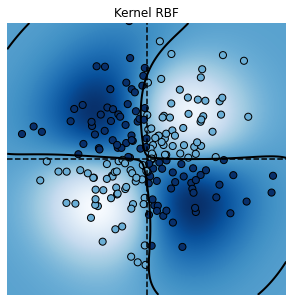

In [ ]:
#se usa kernel RBF porque es el por defecto
est = ms.GridSearchCV(
    svm.SVC(), {'C': np.logspace(-3., 3., 10),
                'gamma': np.logspace(-3., 3., 10)})
est.fit(X_train, y_train)
print("Score: {0:.3f}".format(
      ms.cross_val_score(est, X_train, y_train).mean()))

plot_decision_function(
    est.best_estimator_, "Kernel RBF")

In [ ]:
y_pred = est.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[21  3]
 [ 5 21]]
              precision    recall  f1-score   support

       False       0.81      0.88      0.84        24
        True       0.88      0.81      0.84        26

    accuracy                           0.84        50
   macro avg       0.84      0.84      0.84        50
weighted avg       0.84      0.84      0.84        50



#### Kernel Polinomial

<p align="justify">Asimismo, se puede ver en la gráfica a continuación y los resultados de clasificación, que con el kernel polinomial se consiguen etiqetar correctamente 49 datos de los 50 que componen el subconjunto de validación, dando como resultado una <i>accuracy</i> del 98%.  </p>

Score: 0.987


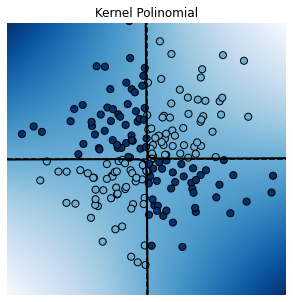

In [ ]:
#se usa poliniomio
est = ms.GridSearchCV(
      svm.SVC(kernel='poly', degree=2), {'C': np.logspace(-3., 3., 10),
                'gamma': np.logspace(-3., 3., 10)})
est.fit(X_train, y_train)
print("Score: {0:.3f}".format(
      ms.cross_val_score(est, X_train, y_train).mean()))

plot_decision_function(
    est.best_estimator_, "Kernel Polinomial")

In [ ]:
y_pred = est.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[23  1]
 [ 0 26]]
              precision    recall  f1-score   support

       False       1.00      0.96      0.98        24
        True       0.96      1.00      0.98        26

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



#### Kernel Sigmoide

<p align="justify">Finalmente, con el kernel sigmoide y el conjunto de datos no linealmente separable, se consiguen unos resultados de clasificación bastante bajos, en concreto un porcentaje del 50% de exactitud.</p>

Score: 0.633


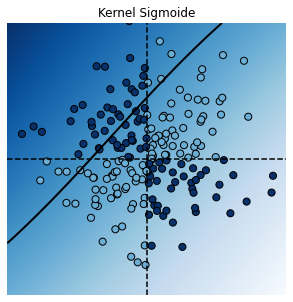

In [ ]:
#se usa sigmoide
est = ms.GridSearchCV(
      svm.SVC(kernel='sigmoid'), {'C': np.logspace(-3., 3., 10),
                'gamma': np.logspace(-3., 3., 10)})
est.fit(X_train, y_train)
print("Score: {0:.3f}".format(
      ms.cross_val_score(est, X_train, y_train).mean()))

plot_decision_function(
    est.best_estimator_, "Kernel Sigmoide")

In [ ]:
y_pred = est.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[21  3]
 [22  4]]
              precision    recall  f1-score   support

       False       0.49      0.88      0.63        24
        True       0.57      0.15      0.24        26

    accuracy                           0.50        50
   macro avg       0.53      0.51      0.43        50
weighted avg       0.53      0.50      0.43        50



### Algoritmos Clasificadores

<p align="justify">A continuación, se procede a crear los modelos con los algoritmos de clasificación <i>Random Forest</i>, <i>K-Nearest Neighbors</i> y <i>Decision Tree</i> y comparar sus resultados.</p>

#### Random Forest

<p align="justify">Con el algoritmo de <i>Random Forest</i> y este conjunto de datos, se consiguen clasificar de manera correcta 35 de los datos. En otras palabras, se obtiene como resultado un porcentaje de exactitud del 70%.</p>

In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[24  0]
 [15 11]]
              precision    recall  f1-score   support

       False       0.62      1.00      0.76        24
        True       1.00      0.42      0.59        26

    accuracy                           0.70        50
   macro avg       0.81      0.71      0.68        50
weighted avg       0.82      0.70      0.67        50



#### K-Nearest Neighbors

<p align="justify">Con el algoritmo KNN, se consiguen etiquetar de manera correcta 6 datos más que con el algoritmo anterior, dando como resultado un valor de la <i>accuracy</i> del 82%.</p>

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[21  3]
 [ 6 20]]
              precision    recall  f1-score   support

       False       0.78      0.88      0.82        24
        True       0.87      0.77      0.82        26

    accuracy                           0.82        50
   macro avg       0.82      0.82      0.82        50
weighted avg       0.83      0.82      0.82        50



#### Decision Tree

<p align="justify">Por último, se consiguen etiquetar de manera correcta 47 datos. Consiguiendo mejores resultados de clasificación que los dos algoritmos anteriores. Con este algoritmo, se ha conseguido un porcentaje de exactitud del 94%.</p>

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[21  3]
 [ 0 26]]
              precision    recall  f1-score   support

       False       1.00      0.88      0.93        24
        True       0.90      1.00      0.95        26

    accuracy                           0.94        50
   macro avg       0.95      0.94      0.94        50
weighted avg       0.95      0.94      0.94        50



#Conjunto de datos real

<p align="justify">Finalmente, se va a utilizar un conjunto de datos real, para hacer la comparación de los resultados de distintos modelos creados con SVM y diferentes kernels, con los algoritmos de clasificación utilizados en todo el proyecto.</p>

## Preprocesamiento de datos

<p align="justify">En primer lugar, se debe realizar el preprocesamiento de los datos, para que sea más sencillo trabajar con ellos. El <i>dataset</i> que se va a utilizar es uno compuesto por datos de pacientes que han podido presentar o no cáncer de mama. En el se recoge todo tipo de información médica sobre el tumor presente en las mamas y si ha resultado ser benigno o maligno. </p>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cancer_de_mama.csv to cancer_de_mama.csv


In [ ]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['cancer_de_mama.csv']))
del df["Unnamed: 32"]

<p align="justify">Después de haber cargado el conjunto de datos, se procede a mostrar los diez primeros registros que lo componen, de forma que se pueda ver claramente su estructura. La variable de clase en este conjunto de datos es la denominada <i>diagnosis</i> que es igual a 'M' si el tumor ha sido diagnosticado como maligno o igual a 'B', si ha sido diagnosticado como benigno. </p>

In [ ]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


<p align="justify">Como se puede ver a continuación, el <i>dataset</i> está compuesto por 32 columnas, dos de ellas relativas al id del registro y al diagnóstico del tumor. Las demás, recogen datos sobre su tamaño, textura o simetría entre otros. Asimismo, se observa que todos los valores son de tipo <i>float</i>.</p>

In [ ]:
print(df.columns)
print(df.dtypes)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64


<p align="justify">El siguiente paso es el de comprobar si tiene algún valor vacío o nulo, ya que si los hubiera, habría que elegir alguna técnica para su manejo. En este caso concreto, todos los datos tiene valores, es decir, no se tienen ningun valor nulo o vacío y, por tanto, no hay que hacer nada a este respecto.</p>

In [ ]:
df.count()

id                         569
diagnosis                  569
radius_mean                569
texture_mean               569
perimeter_mean             569
area_mean                  569
smoothness_mean            569
compactness_mean           569
concavity_mean             569
concave points_mean        569
symmetry_mean              569
fractal_dimension_mean     569
radius_se                  569
texture_se                 569
perimeter_se               569
area_se                    569
smoothness_se              569
compactness_se             569
concavity_se               569
concave points_se          569
symmetry_se                569
fractal_dimension_se       569
radius_worst               569
texture_worst              569
perimeter_worst            569
area_worst                 569
smoothness_worst           569
compactness_worst          569
concavity_worst            569
concave points_worst       569
symmetry_worst             569
fractal_dimension_worst    569
dtype: i

<p align="justify">A continuación, se comprueba si los datos están balanceados o no, ya que si estuvieran desbalanceados, el modelo podría tender a clasificar más a favor de la clase con mayor número de instancias. En este conjunto de datos, se puede ver que hay un desbalanceo de los datos, pues de los 569 registros que hay, 357 de ellos fueron clasificados como benignos, mientras que los 212 restantes fueron etiquetados como malignos.</p>

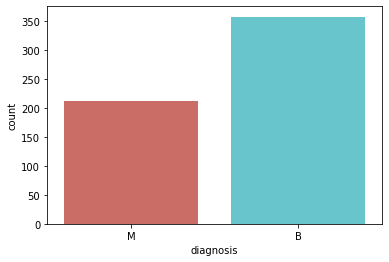

In [ ]:
#Visualize this count
sns.countplot(df['diagnosis'],label="Count",palette='hls')
plt.show()

<p align="justify">Para balancear los datos, se ha decidido utilizar la técnica denominada <i>Undersampling</i>, que se encarga de coger una muestra de registros aleatorios del tamaño del conjunto de registros etiquetados como la clase minoritaria. Para ello, se debe pasar primero los valores de la clase a binario, es decir, si es Maligno será igual a 1 y si es Benigno será igual a 0.</p>

In [ ]:
y = df['diagnosis']
y_num = pd.get_dummies(y)
y = y_num.M
print(y.shape)
y.tail()

(569,)


564    1
565    1
566    1
567    1
568    0
Name: M, dtype: uint8

<p align="justify">Luego, se crean dos nuevos <i>dataframes</i>, uno con la cantidad de registros etiquetados como benignos y otro con el número de etiquetados como malignos. Finalmente, basta con crear un nuevo <i>dataframe</i> formado por una muestra aleatoria de los benignos del tamaño de los malignos.</p>

In [ ]:
count_class_0, count_class_1 = y.value_counts()
df_class_0 = df[y == 0]
df_class_1 = df[y == 1]
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)


print('Submuestreo aleatorio:')
print(df_test_under.diagnosis.value_counts())
df_test_under.head()

Submuestreo aleatorio:
B    212
M    212
Name: diagnosis, dtype: int64


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
107,863270,B,12.36,18.54,79.01,466.7,0.08477,0.06815,0.02643,0.01921,...,13.29,27.49,85.56,544.1,0.1184,0.1963,0.1937,0.08442,0.2983,0.07185
427,90745,B,10.80,21.98,68.79,359.9,0.08801,0.05743,0.03614,0.01404,...,12.76,32.04,83.69,489.5,0.1303,0.1696,0.1927,0.07485,0.2965,0.07662
88,861597,B,12.36,21.80,79.78,466.1,0.08772,0.09445,0.06015,0.03745,...,13.83,30.50,91.46,574.7,0.1304,0.2463,0.2434,0.12050,0.2972,0.09261
474,911391,B,10.88,15.62,70.41,358.9,0.10070,0.10690,0.05115,0.01571,...,11.94,19.35,80.78,433.1,0.1332,0.3898,0.3365,0.07966,0.2581,0.10800
495,914333,B,14.87,20.21,96.12,680.9,0.09587,0.08345,0.06824,0.04951,...,16.01,28.48,103.90,783.6,0.1216,0.1388,0.1700,0.10170,0.2369,0.06599


<p align="justify">De esta manera, se consigue tener un conjunto de datos balanceado, con 212 casos benignos y 212 casos malignos, los cuales son bastantes para poder luego entrenar y validar bien los modelos predictivos.</p>

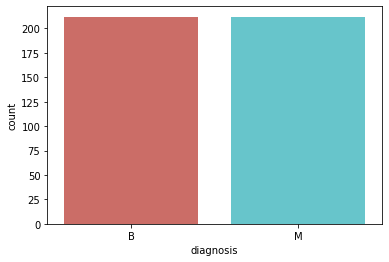

In [ ]:
sns.countplot(df_test_under['diagnosis'],label="Count",palette='hls')
plt.show()

<p align="justify">Lo siguiente que se debe hacer es dividir el conjunto de datos en dos <i>dataframes</i>, uno que contenga toda la información del tumor (X) y otro que contenga su clasificación final (y).</p>

In [ ]:
X = df_test_under.iloc[:,2:32]
print(X.shape)
y = df_test_under['diagnosis'] #La y será la clase -> 'M' maligno, 'B' benigno
print(y.shape)

(424, 30)
(424,)


<p align="justify">A continuación, se estudia la correlación de las variables, de manera que se pueda encontrar cuál de ellas está bastante relacionada con las demás y ver si se pueden eliminar sin perder información. Para este cometido, se hace uso de un mapa de calor, en el que se muestra en colores más oscuras las variables que están más relacionadas entre sí. En este caso, se puede ver como las variables <i>radius</i>, <i>perimeter</i> y <i>area</i> están fuertemente relacionadas entre sí y esto tiene sentido puesto que, por definición matemática, usando el radio se puede calcular la longitud del perímetro y del área y viceversa. </p>

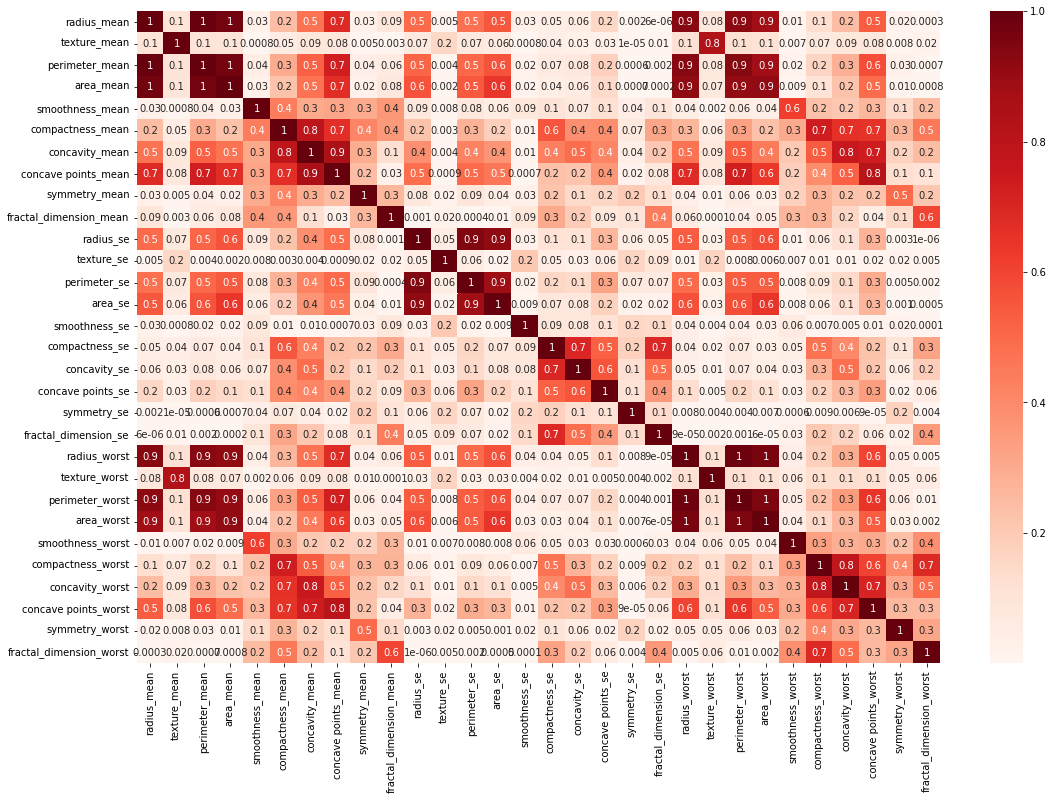

In [ ]:
plt.figure(figsize=(18,12))
cor = X.corr()
sns.heatmap(cor**2, annot = True,cmap= plt.cm.Reds, fmt='.1g')
plt.show()

<p align="justify">Una de las técnicas que existen para eliminar la correlación de variables y reducir al mínimo el número de variables sin perder información es la llamada <i>Principal Component Analysis</i> o PCA, que se encarga de simplificar la complejidad del conjunto de datos, condensando la información aportada por múltiples variables solo en unas pocas componentes.</p>

In [ ]:
#reducing the attributes in X dataframe

#1 scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#2 drop the highly correlated columns which are not useful i.e., area, perimeter, perimeter_worst, area_worst, perimeter_se, area_se 
X_scaled = pd.DataFrame(X_scaled)
X_scaled_drop = X_scaled.drop(X_scaled.columns[[2, 3, 12, 13, 22, 23]], axis=1)

#3 apply PCA on scaled data
pca = PCA(n_components=0.95)
x_pca = pca.fit_transform(X_scaled_drop)
x_pca = pd.DataFrame(x_pca)

print("Before PCA, X dataframe shape = ",X.shape,"\nAfter PCA, x_pca dataframe shape = ",x_pca.shape)

Before PCA, X dataframe shape =  (424, 30) 
After PCA, x_pca dataframe shape =  (424, 11)


<p align="justify">Después de haber hecho el PCA, se ha conseguido disminuir las variables de 30 a 11, dando como resultado el siguiente mapa de calor, en el que se puede ver cómo han desaparecido las correlaciones y se ha disminuido el número de variables.</p>

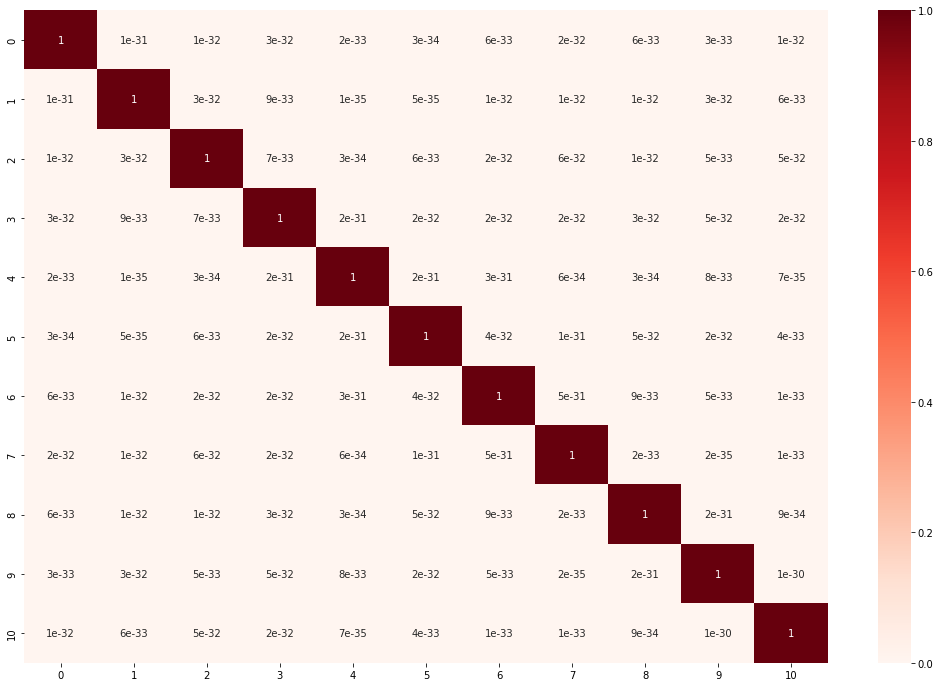

In [ ]:
plt.figure(figsize=(18,12))
cor = x_pca.corr()
sns.heatmap(cor**2, annot = True,cmap= plt.cm.Reds, fmt='.1g')
plt.show()

## Entrenamiento y test



<p align="justify">Ahora, ya se puede crear el nuevo <i>dataframe</i> con los datos balanceados y con la correlación de variables eliminada. Esto da como resultado el siguiente conjunto de datos:</p>

In [ ]:
colnames = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10', 'PC11', 'diagnosis']

#target data
diag = df_test_under.iloc[:,1:2]

#combine PCA and target data
Xy = pd.DataFrame(np.hstack([x_pca,diag.values]),columns=colnames)
Xy.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,diagnosis
0,-3.430923,-0.48366,-1.325537,0.634777,0.68995,0.444995,-0.08992,-0.363668,0.256032,0.168026,-0.095266,B
1,-2.182599,0.62684,0.393838,1.627623,-0.219366,0.650211,0.332538,-0.811738,-0.51135,0.340503,-0.007719,B
2,-0.81665,0.810502,0.20655,1.279094,0.283261,0.27822,-0.09783,-0.35982,-0.549972,-0.236295,0.073504,B
3,-1.282125,1.84632,-2.306114,-0.529683,1.450002,-0.573698,-0.818668,0.073238,-0.349051,0.496031,0.025644,B
4,-2.387633,-0.950792,0.741286,0.485547,-0.125679,-0.317739,-0.095537,-0.657699,1.144164,-0.363687,-0.004993,B


<p align="justify">Finalmente, antes de comenzar con las tareas de clasificación, se divide el nuevo conjunto de datos en dos subconjuntos: uno para el entrenamiento del modelo y otro para su validación.

In [ ]:
X=(Xy.iloc[:,0:10]).values
#75:25 train:test data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print("X_train shape ",X_train.shape)
print("y_train shape ",y_train.shape)
print("X_test shape ",X_test.shape)
print("y_test shape ",y_test.shape)

X_train shape  (318, 10)
y_train shape  (318,)
X_test shape  (106, 10)
y_test shape  (106,)


## SVM con diferentes Kernels

<p align="justify">Para llevar a cabo las tareas de clasificación, se van a utilizar los mismos kernels que con los conjuntos de datos artificiales (Lineal, RBF, Polinomial y Sigmoide).

### Kernel Lineal

<p align="justify">El primero de los kernels que se utiliza es el lineal, que en este caso, se puede ver que los datos reales, son linealmente separables, puesto se ha conseguido un porcentaje de exactitud de clasificación del 99%.</p>

In [ ]:
#model fitting
svc = svm.LinearSVC()
svc.fit(X_train, y_train)
print("Score: {0:.3f}".format(
      ms.cross_val_score(svc, X_train, y_train).mean()))

Score: 0.959


In [ ]:
y_pred = svc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[62  0]
 [ 1 43]]
              precision    recall  f1-score   support

           B       0.98      1.00      0.99        62
           M       1.00      0.98      0.99        44

    accuracy                           0.99       106
   macro avg       0.99      0.99      0.99       106
weighted avg       0.99      0.99      0.99       106



### Kernel RBF

<p align="justify">A continuación, se crea un SVM con kernel RBF y se consigue clasificar correctamente 104 de los 106 datos de validación, dando como resultado una <i>accuracy</i> del 98%.</p>

In [ ]:
#model fitting
svc = svm.SVC()
svc.fit(X_train, y_train)
print("Score: {0:.3f}".format(
      ms.cross_val_score(svc, X_train, y_train).mean()))

Score: 0.959


In [ ]:
y_pred = svc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[62  0]
 [ 2 42]]
              precision    recall  f1-score   support

           B       0.97      1.00      0.98        62
           M       1.00      0.95      0.98        44

    accuracy                           0.98       106
   macro avg       0.98      0.98      0.98       106
weighted avg       0.98      0.98      0.98       106



### Kernel Polinomial

<p align="justify">Por otro lado, se utiliza el kernel polinomial que, en este caso, consigue un porcentaje de exactitud del 97%, el cual es un poco más bajo que los dos anteriores pero sigue habiendo clasificado la mayoría de los datos de validación correctamente.</p>

In [ ]:
#model fitting
svc = svm.SVC(kernel='poly')
svc.fit(X_train, y_train)
print("Score: {0:.3f}".format(
      ms.cross_val_score(svc, X_train, y_train).mean()))

Score: 0.944


In [ ]:
y_pred = svc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[60  2]
 [ 1 43]]
              precision    recall  f1-score   support

           B       0.98      0.97      0.98        62
           M       0.96      0.98      0.97        44

    accuracy                           0.97       106
   macro avg       0.97      0.97      0.97       106
weighted avg       0.97      0.97      0.97       106



### Kernel Sigmoide

<p align="justify">Finalmente, se hace uso del kernel sigmoide, que con este conjunto de datos reales parece ser que clasifica mucho mejor que con los conjuntos de datos artificiales anteriores. Concretamente, ha clasificado de manera correcta 97 de los 106 datos de validación, con un porcentaje de <i>accuracy</i> resultante del 92%.</p>

In [ ]:
#model fitting
svc = svm.SVC(kernel='sigmoid')
svc.fit(X_train, y_train)
print("Score: {0:.3f}".format(
      ms.cross_val_score(svc, X_train, y_train).mean()))

Score: 0.931


In [ ]:
y_pred = svc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[55  7]
 [ 2 42]]
              precision    recall  f1-score   support

           B       0.96      0.89      0.92        62
           M       0.86      0.95      0.90        44

    accuracy                           0.92       106
   macro avg       0.91      0.92      0.91       106
weighted avg       0.92      0.92      0.92       106



## Algoritmos Clasificadores

<p align="justify">Por último, se procede a entrenar los modelos y calcular las predicciones con los algoritmos de clasificación utilizados anteriormente.</p>

### Random Forest

<p align="justify">El primero de los algoritmos es <i>Random Forest</i> y con él se consigue un porcentaje de exactitud del 91%, ya que clasifica correctamente 96 de los 106 datos que componen el subconjunto de validación.</p>

In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[54  8]
 [ 2 42]]
              precision    recall  f1-score   support

           B       0.96      0.87      0.92        62
           M       0.84      0.95      0.89        44

    accuracy                           0.91       106
   macro avg       0.90      0.91      0.90       106
weighted avg       0.91      0.91      0.91       106



### K-Nearest Neighbors

<p align="justify">Con este algoritmo de clasificación, se etiquetan de manera correcta 101 de los casos de validación, es decir, clasifica con un 95% de exactitud.</p>

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[61  1]
 [ 4 40]]
              precision    recall  f1-score   support

           B       0.94      0.98      0.96        62
           M       0.98      0.91      0.94        44

    accuracy                           0.95       106
   macro avg       0.96      0.95      0.95       106
weighted avg       0.95      0.95      0.95       106



### Decision Tree

<p align="justify">Finalmente, se crea el modelo con el algoritmo de <i>Decision </i> y se consigue un porcentaje de <i>accuracy</i> del 90%, ya que ha conseguido clasificar 95 datos correctamente.</p>

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[54  8]
 [ 3 41]]
              precision    recall  f1-score   support

           B       0.95      0.87      0.91        62
           M       0.84      0.93      0.88        44

    accuracy                           0.90       106
   macro avg       0.89      0.90      0.89       106
weighted avg       0.90      0.90      0.90       106



#Conclusiones

<p align="justify">Después de haber realizado un estudio y una comparación de resultados entre los distintos modelos de clasificación creados, se han podido concluir varios aspectos:
<ul type="1" align="justify">
<li>Con el conjunto de datos artificiales linealmente separable se consiguen mejores resultados con la Máquina de Vector de Soporte que con los algoritmos de clasificación aprendidos en asignaturas anteriores, que son <i>Random Forest</i>, <i>K-Nearest Neighbors</i> y <i>Decision Tree</i>. Además, con este tipo de <i>dataset</i> y una SVM se han conseguido los mejores resultados de clasificación de entre todos los obtenidos (gran parte fueron del 100% de exactitud).</li>
<li>Al igual que con los anteriores, con los datos sintéticos no linealmente separables también se presentan mejores resultados de clasificación con las SVM con los distintos kernels que con los algoritmos de clasificación.</li>
<li>Asimismo, cuando se crean los modelos y se realizan las predicciones con el conjunto de datos real, se consiguen, una vez más, mejores resultados con las SVM que con los algoritmos clasificadores. </li>
<li>En los tres casos, coincide que de los kernels utilizados, que son el Lineal, RBF, Polinomial y Sigmoide, este último fue el que dio lugar a los resultados de clasificación más bajos en comparación con los demás kernels.  </li>
<li>Por tanto, se podría decir que ha quedado demostrado que la SVM es una poderosa herramienta de clasificación con la que se consiguen mejores resultados que otros algoritmos de clasificación con conjuntos de datos totalmente distintos.</li>
</ul>
</p>